# Analysing Economic Data with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key = '2c641829ab9aab3568423b198fedf57b'

# Create FRED object

In [2]:
fred = Fred(api_key=fred_key)

# Search for Economic Data

In [3]:
sp_search = fred.search('S&P', order_by='popularity')

In [4]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-05-07,2023-05-07,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-05-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-05-05 08:07:02-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-05-07,2023-05-07,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-02-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-04-25 08:13:02-05:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-05-07,2023-05-07,S&P 500,2013-05-06,2023-05-05,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-05-05 19:10:50-05:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-05-07,2023-05-07,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-05-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-05-05 08:07:06-05:00,83,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-05-07,2023-05-07,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


## Pull Raw Data & Plot

In [5]:
sp_500 = fred.get_series(series_id ='SP500')

<Axes: title={'center': 'S&P 500'}, ylabel='Price in USD'>

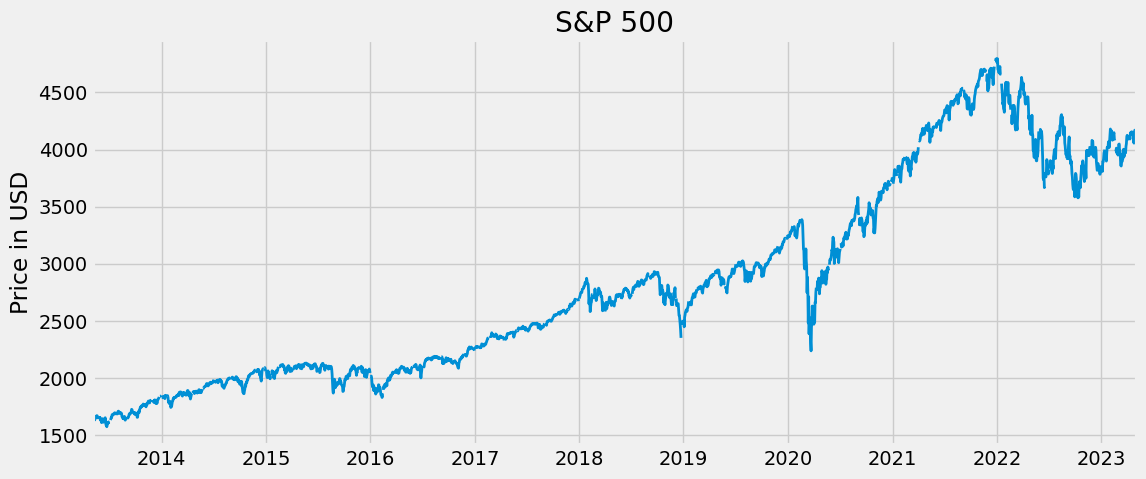

In [6]:
sp_500.plot(title='S&P 500', figsize=(12,5), ylabel='Price in USD', lw = 2)

## Pull & Join Multiple Data Series

In [7]:
up_results = fred.search('unemployment', order_by='popularity')

In [8]:
up_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2023-05-07,2023-05-07,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-04-12 11:11:01-05:00,96,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2023-05-07,2023-05-07,Unemployment Rate,1948-01-01,2023-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-05 07:44:02-05:00,95,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2023-05-07,2023-05-07,"All Employees, Total Nonfarm",1939-01-01,2023-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-05-05 07:45:01-05:00,84,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2023-05-07,2023-05-07,Initial Claims,1967-01-07,2023-04-29,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-05-04 07:33:01-05:00,82,An initial claim is a claim filed by an unempl...
CES0500000003,CES0500000003,2023-05-07,2023-05-07,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2023-04-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2023-05-05 07:45:01-05:00,79,The series comes from the 'Current Employment ...


In [9]:
unrate = fred.get_series('UNRATE')
unrate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

<Axes: title={'center': 'Unemployment Rate'}, ylabel='Percent'>

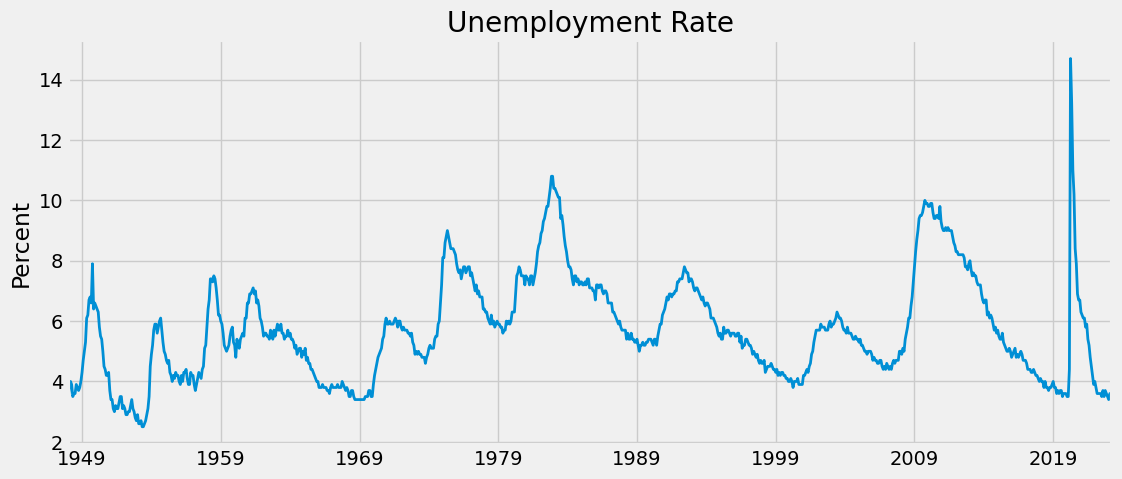

In [10]:
unrate.plot(title='Unemployment Rate', figsize=(12,5), ylabel='Percent', lw = 2)

## Tests

In [11]:
fred.search('unemployment rate in New York City', filter = ('frequency', 'Monthly'))

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
NEWY636URN,NEWY636URN,2023-05-07,2023-05-07,Unemployment Rate in New York-Newark-Jersey Ci...,1990-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:10:04-05:00,22,None
NEWY636UR,NEWY636UR,2023-05-07,2023-05-07,Unemployment Rate in New York-Newark-Jersey Ci...,1990-01-01,2023-03-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-05-03 13:32:11-05:00,2,None
NYBRON5URN,NYBRON5URN,2023-05-07,2023-05-07,"Unemployment Rate in Bronx County, NY",1990-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:15:02-05:00,15,These data come from the Current Population Su...
NYKING7URN,NYKING7URN,2023-05-07,2023-05-07,"Unemployment Rate in Kings County, NY",1990-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:15:03-05:00,13,These data come from the Current Population Su...
NYNEWY1URN,NYNEWY1URN,2023-05-07,2023-05-07,"Unemployment Rate in New York County, NY",1990-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:15:03-05:00,13,These data come from the Current Population Su...
NYWEST9URN,NYWEST9URN,2023-05-07,2023-05-07,"Unemployment Rate in Westchester County, NY",1990-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:15:04-05:00,10,These data come from the Current Population Su...
NJHUDS7URN,NJHUDS7URN,2023-05-07,2023-05-07,"Unemployment Rate in Hudson County, NJ",1990-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:16:03-05:00,9,These data come from the Current Population Su...
NYQUEE1URN,NYQUEE1URN,2023-05-07,2023-05-07,"Unemployment Rate in Queens County, NY",1990-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:15:04-05:00,7,These data come from the Current Population Su...
NYSUFF0URN,NYSUFF0URN,2023-05-07,2023-05-07,"Unemployment Rate in Suffolk County, NY",1990-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:15:04-05:00,4,These data come from the Current Population Su...


In [12]:
## plot NEWY636UR

unrate_ny = fred.get_series('NEWY636UR')
unrate_ny.head()

1990-01-01    5.0
1990-02-01    5.0
1990-03-01    5.0
1990-04-01    5.0
1990-05-01    5.0
dtype: float64

<Axes: title={'center': 'Unemployment Rate in New York | Newark | Jersey City'}, ylabel='Percent'>

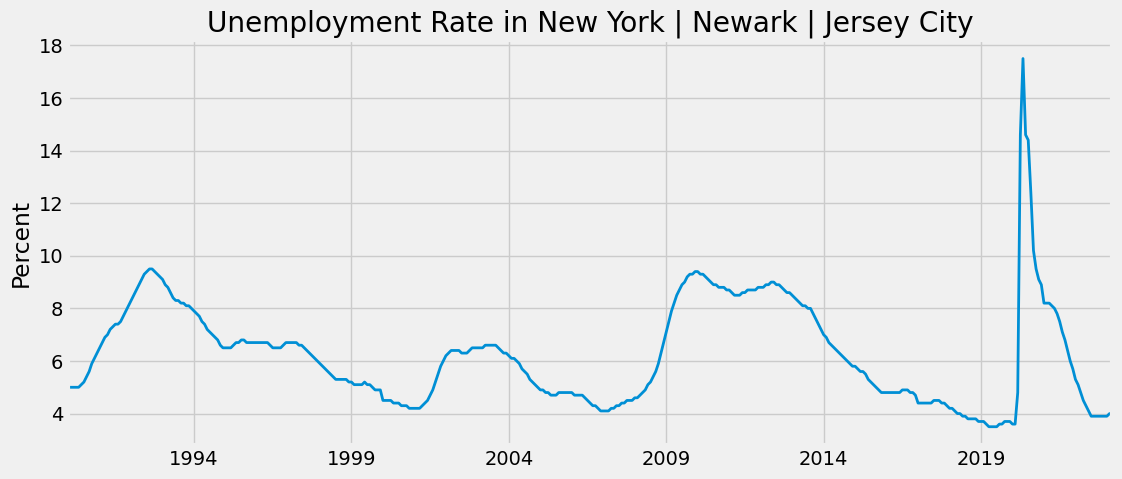

In [13]:
##plot unrate_ny

unrate_ny.plot(title='Unemployment Rate in New York | Newark | Jersey City', figsize=(12,5), ylabel='Percent', lw = 2)


In [14]:
fred.search('NJ inflation')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CUURA101SA0L1E,CUURA101SA0L1E,2023-05-07,2023-05-07,Consumer Price Index for All Urban Consumers: ...,1982-01-01,2023-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-04-12 11:11:54-05:00,1,None
CUUSA101SA0L1E,CUUSA101SA0L1E,2023-05-07,2023-05-07,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2022-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-01-12 07:40:57-06:00,0,None
CUURA101SEHA,CUURA101SEHA,2023-05-07,2023-05-07,Consumer Price Index for All Urban Consumers: ...,1914-12-01,2023-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-04-12 11:11:01-05:00,34,None
CUUSA101SEHA,CUUSA101SEHA,2023-05-07,2023-05-07,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2022-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-01-12 07:39:04-06:00,5,None
CUURA101SA0,CUURA101SA0,2023-05-07,2023-05-07,Consumer Price Index for All Urban Consumers: ...,1914-12-01,2023-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-04-12 11:11:02-05:00,28,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCRGMP12100,PCRGMP12100,2023-05-07,2023-05-07,Total Per Capita Real Gross Domestic Product f...,2001-01-01,2017-01-01,Annual,A,Chained 2009 Dollars,Chn. 2009 $,Not Seasonally Adjusted,NSA,2018-09-18 08:32:04-05:00,0,The All industry total includes all Private in...
RGMP45940,RGMP45940,2023-05-07,2023-05-07,"Total Real Gross Domestic Product for Trenton,...",2001-01-01,2021-01-01,Annual,A,Millions of Chained 2012 Dollars,Mil. of Chn. 2012 $,Not Seasonally Adjusted,NSA,2022-12-08 08:34:44-06:00,0,The All industry total includes all Private in...
IPUZNL060340000,IPUZNL060340000,2023-05-07,2023-05-07,Real Labor Compensation for Private Nonfarm in...,2007-01-01,2021-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2022-06-14 12:31:24-05:00,0,Real labor compensation is defined as payments...


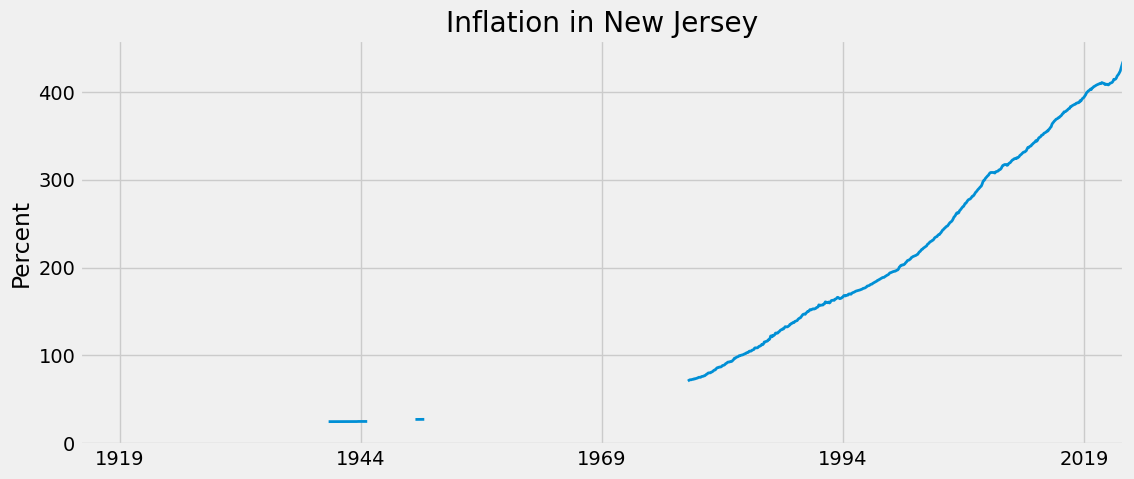

In [15]:
nj_inflation = fred.get_series('CUURA101SEHA')

plot_nj_inflation = nj_inflation.plot(title='Inflation in New Jersey', figsize=(12,5), ylabel='Percent', lw = 2)